In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from collections import defaultdict
import numpy as np
from itertools import product, combinations
from collections import defaultdict

def lorenz_system(state, sigma=10, beta=8/3, rho=28):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return np.array([dxdt, dydt, dzdt])

def runge_kutta_step(f, y, t, dt):
    k1 = f(y)
    k2 = f(y + 0.5 * dt * k1)
    k3 = f(y + 0.5 * dt * k2)
    k4 = f(y + dt * k3)
    return y + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)

def integrate_lorenz(y0, t0, t1, dt):
    t = t0
    y = y0
    ys = [y0]
    ts = [t0]
    while t < t1:
        y = runge_kutta_step(lorenz_system, y, t, dt)
        t += dt
        ys.append(y)
        ts.append(t)
    return np.array(ts), np.array(ys)

# Начальные условия и параметры
y0 = np.array([1.0, 1.0, 1.0])
t0 = 0.0
t1 = 1400.0
dt = 0.1

# Интегрирование уравнений Лоренца
ts, ys = integrate_lorenz(y0, t0, t1, dt)
# Normalize the Lorenz series
def normalize(data):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

normalized_data = normalize(ys)
data = normalized_data
data


array([[0.36787988, 0.36787988, 0.36787988],
       [0.38540733, 0.41457627, 0.3691807 ],
       [0.446413  , 0.54511887, 0.41243394],
       ...,
       [0.32895438, 0.34200946, 0.65268184],
       [0.33021774, 0.32384853, 0.58545941],
       [0.31437222, 0.28841283, 0.54010316]])

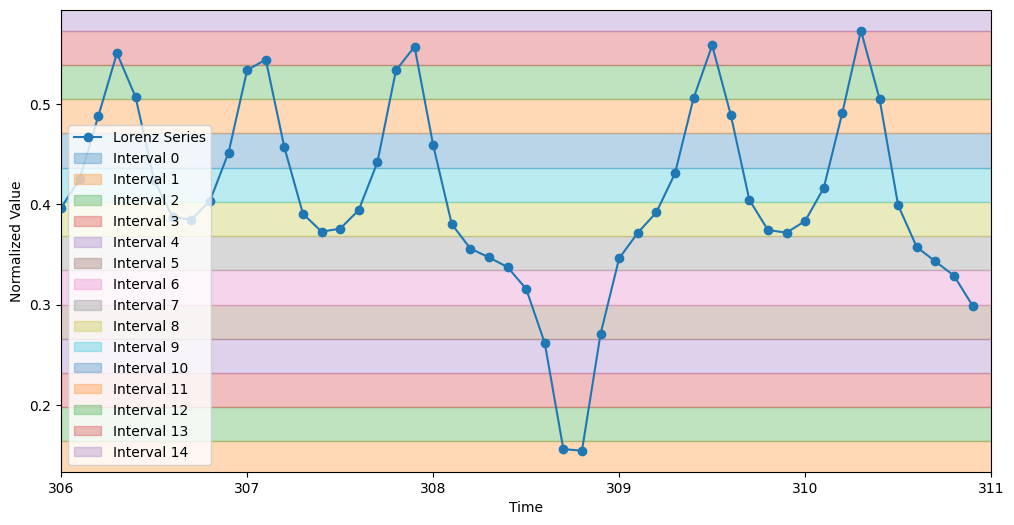

In [37]:
# Создание интервалов и кодирование данных
def create_intervals(data, num_intervals=15):
    min_val = np.min(data)
    max_val = np.max(data)
    intervals = np.linspace(min_val, max_val, num_intervals + 1)
    return intervals

def encode_data(data, intervals):
    encoded_data = []
    for value in data:
        for i in range(len(intervals) - 1):
            if intervals[i] <= value < intervals[i + 1]:
                encoded_data.append(i)  # Используем числа вместо символов
                break
    return encoded_data

intervals = create_intervals(data[:, 0])  # Кодируем по первой координате x
encoded_data = encode_data(data[:, 0], intervals)

# Визуализация исходного ряда и интервалов
plt.figure(figsize=(12, 6))
plt.xlim([306, 311])
plt.plot(ts[3060:3110], data[3060:3110, 0], label='Lorenz Series', marker='o')
for i in range(len(intervals) - 1):
    plt.axhspan(intervals[i], intervals[i + 1], color=f'C{i}', alpha=0.3, label=f'Interval {i}')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
# plt.title('Normalized Lorenz Attractor with Intervals')
plt.legend()
plt.show()


In [3]:
# Создание интервалов и кодирование данных
def create_intervals(data, num_intervals=10):
    # min_val = np.min(data)
    min_val = 0
    # max_val = np.max(data)
    max_val = 1
    intervals = np.linspace(min_val, max_val, num_intervals + 1)
    return intervals

intervals = create_intervals(data[:, 0])  # Создаем интервалы для первой координаты x

def encode_data_with_intervals(data, intervals):
    encoded_data = []
    for value in data:
        for i in range(len(intervals) - 1):
            if intervals[i] <= value < intervals[i + 1]:
                encoded_data.append((intervals[i], intervals[i + 1]))
                break
    return encoded_data

# Преобразуем данные в интервальные представления
encoded_data = encode_data_with_intervals(data[:, 0], intervals)

In [4]:
# Генерация паттернов
def generate_patterns(max_step=10, max_length=4):
    patterns = []
    for pattern in product(range(1, max_step + 1), repeat=max_length):
        patterns.append(list(pattern))
    return patterns

patterns = generate_patterns(max_step=10, max_length=4)
print("Generated patterns:", patterns)

# Генерация z-векторов с интервалами
def generate_z_vectors_with_intervals(data, pattern):
    z_vectors = []
    max_offset = sum(pattern)
    for i in range(len(data) - max_offset):
        z_vector = [data[i]]
        offset = i
        for step in pattern:
            offset += step
            if offset < len(data):
                z_vector.append(data[offset])
        if len(z_vector) == len(pattern) + 1:
            z_vector_intervals = [encode_data_with_intervals([val], intervals)[0] for val in z_vector]
            z_vectors.append(z_vector_intervals)
    return z_vectors

# Генерация z-векторов для каждого паттерна
z_vectors_per_pattern = {tuple(pattern): generate_z_vectors_with_intervals(data[:, 0], pattern) for pattern in patterns[:2]}


Generated patterns: [[1, 1, 1, 1], [1, 1, 1, 2], [1, 1, 1, 3], [1, 1, 1, 4], [1, 1, 1, 5], [1, 1, 1, 6], [1, 1, 1, 7], [1, 1, 1, 8], [1, 1, 1, 9], [1, 1, 1, 10], [1, 1, 2, 1], [1, 1, 2, 2], [1, 1, 2, 3], [1, 1, 2, 4], [1, 1, 2, 5], [1, 1, 2, 6], [1, 1, 2, 7], [1, 1, 2, 8], [1, 1, 2, 9], [1, 1, 2, 10], [1, 1, 3, 1], [1, 1, 3, 2], [1, 1, 3, 3], [1, 1, 3, 4], [1, 1, 3, 5], [1, 1, 3, 6], [1, 1, 3, 7], [1, 1, 3, 8], [1, 1, 3, 9], [1, 1, 3, 10], [1, 1, 4, 1], [1, 1, 4, 2], [1, 1, 4, 3], [1, 1, 4, 4], [1, 1, 4, 5], [1, 1, 4, 6], [1, 1, 4, 7], [1, 1, 4, 8], [1, 1, 4, 9], [1, 1, 4, 10], [1, 1, 5, 1], [1, 1, 5, 2], [1, 1, 5, 3], [1, 1, 5, 4], [1, 1, 5, 5], [1, 1, 5, 6], [1, 1, 5, 7], [1, 1, 5, 8], [1, 1, 5, 9], [1, 1, 5, 10], [1, 1, 6, 1], [1, 1, 6, 2], [1, 1, 6, 3], [1, 1, 6, 4], [1, 1, 6, 5], [1, 1, 6, 6], [1, 1, 6, 7], [1, 1, 6, 8], [1, 1, 6, 9], [1, 1, 6, 10], [1, 1, 7, 1], [1, 1, 7, 2], [1, 1, 7, 3], [1, 1, 7, 4], [1, 1, 7, 5], [1, 1, 7, 6], [1, 1, 7, 7], [1, 1, 7, 8], [1, 1, 7, 9], [1, 1, 

In [12]:
# Определение операции meet для интервалов
def meet(interval1, interval2):
    if isinstance(interval1[0], tuple) and not isinstance(interval2, list):
        interval2 = [interval2] * len(interval1)
    elif isinstance(interval2[0], tuple) and not isinstance(interval1, list):
        interval1 = [interval1] * len(interval2)
        
    try:
        return [(max(a[0], b[0]), min(a[1], b[1])) for a, b in zip(interval1, interval2)]
    except Exception as e:
        print('Error:', e)
        print('interval1 : ',  interval1)
        print('interval2 : ',  interval2)
        raise e

# Замыкание (closure) для интервалов
def closure(interval, intervals):
    closed = interval
    for other in intervals:
        closed = meet(closed, other)
    return closed

# Итеративный алгоритм PSA для интервальных паттерн-структур
def psa_iterative(intervals):
    concepts = []
    queue = [(closure([(0, 1)] * len(intervals[0]), intervals), set())]
    seen = set()
    
    while queue:
        A, B = queue.pop(0)
        state = (tuple(A), frozenset(B))
        if state in seen:
            continue
        seen.add(state)
        concepts.append((A, B))
        for i in range(len(intervals)):
            if i not in B:
                new_A = closure(intervals[i], A)
                new_B = B | {i}
                queue.append((new_A, new_B))
    
    return concepts

# Построение паттерн-структур с использованием итеративного алгоритма PSA
pattern_structures = {pattern: psa_iterative(z_vectors) for pattern, z_vectors in z_vectors_per_pattern.items()}

: 

In [6]:
# Создание интервалов и кодирование данных
def create_intervals(data, num_intervals=10):
    min_val = np.min(data)
    max_val = np.max(data)
    intervals = np.linspace(min_val, max_val, num_intervals + 1)
    return intervals

intervals = create_intervals(data[:, 0])  # Создаем интервалы для первой координаты x

def encode_data_with_intervals(data, intervals):
    encoded_data = []
    for value in data:
        for i in range(len(intervals) - 1):
            if intervals[i] <= value < intervals[i + 1]:
                encoded_data.append((intervals[i], intervals[i + 1]))
                break
    return encoded_data

# Преобразуем данные в интервальные представления
encoded_data = encode_data_with_intervals(data[:, 0], intervals)


In [8]:
len(z_vectors)

9780000

In [ ]:
def meet(interval1, interval2):
    return [(min(a[0], b[0]), max(a[1], b[1])) for a, b in zip(interval1, interval2)]

def closure(interval, intervals):
    closed = interval
    for other in intervals:
        closed = meet(closed, other)
    return closed

def cbo(intervals):
    concepts = []
    def explore(A, B):
        nonlocal concepts
        concepts.append((A, B))
        for i in range(len(intervals)):
            if i not in B:
                new_A = closure(intervals[i], A)
                new_B = B | {i}
                if (new_A, new_B) not in concepts:
                    explore(new_A, new_B)
    explore(closure([], intervals), set())
    return concepts

# Build pattern structures using CloseByOne algorithm
pattern_structures = {pattern: cbo(intervals) for pattern, intervals in intervals_per_pattern.items()}


In [ ]:
def predict_next(motifs, concept_lattice, current_sequence):
    possible_next = []
    for concept in concept_lattice:
        if tuple(current_sequence[-len(concept):]) in concept:
            next_positions = [i + len(concept) for i in concept_lattice[concept] if i + len(concept) < len(motifs)]
            possible_next.extend([motifs[i][len(concept)] for i in next_positions])  # Получаем следующий элемент правильно
    if possible_next:
        return max(set(possible_next), key=possible_next.count)
    return None


def predict_series(data, intervals, patterns, start_index=3000, steps_ahead=100):
    encoded_data = encode_data(data, intervals)
    predictions = []
    current_sequence = encoded_data[:start_index]
    
    for _ in range(steps_ahead):
        z_vectors = generate_z_vectors(current_sequence, patterns)
        concept_lattice = build_concept_lattice(z_vectors)
        next_prediction = predict_next(z_vectors, concept_lattice, current_sequence)
        if next_prediction is not None:
            predictions.append(next_prediction)
            current_sequence.append(next_prediction)
        else:
            break
    return predictions

steps_ahead = 100
predicted_series = predict_series(data[:, 0], intervals, patterns, start_index=13000, steps_ahead=steps_ahead)
print(predicted_series)


In [ ]:
def calculate_rmse(actual, predicted):
    return np.sqrt(np.mean((np.array(actual) - np.array(predicted)) ** 2))

def calculate_mape(actual, predicted):
    return np.mean(np.abs((np.array(actual) - np.array(predicted)) / np.array(actual))) * 100

actual_values = data[:, 0][-steps_ahead:]
predicted_values = predicted_series[:len(actual_values)]

rmse = calculate_rmse(actual_values, predicted_values)
mape = calculate_mape(actual_values, predicted_values)

print("RMSE:", rmse)
print("MAPE:", mape)


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(data[:, 0])), data[:, 0], label='Actual Data')
plt.plot(range(len(data[:, 0]) - steps_ahead, len(data[:, 0])), predicted_values, label='Predicted Data', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Lorenz Series Prediction')
plt.legend()
plt.show()


In [3]:
# Генерация паттернов
def generate_patterns(max_step=10, max_length=4):
    patterns = []
    for pattern in product(range(1, max_step + 1), repeat=max_length):
        patterns.append(list(pattern))
    return patterns

patterns = generate_patterns(max_step=10, max_length=4)

# Генерация z-векторов
def generate_z_vectors(data, pattern):
    z_vectors = []
    max_offset = sum(pattern)
    for i in range(len(data) - max_offset):
        z_vector = [data[i]]
        offset = i
        for step in pattern:
            offset += step
            if offset < len(data):
                z_vector.append(data[offset])
        if len(z_vector) == len(pattern) + 1:
            z_vectors.append(z_vector)
    return z_vectors

# Генерация z-векторов для каждого паттерна
z_vectors_per_pattern = {tuple(pattern): generate_z_vectors(data[:, 0], pattern) for pattern in patterns[]}


In [31]:
import numpy as np
from itertools import product
from sklearn.cluster import DBSCAN
import networkx as nx
import matplotlib.pyplot as plt
import random 
# Кластеризация Z-векторов с использованием DBSCAN и определение центроидов
def cluster_z_vectors(z_vectors, eps=0.5, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(z_vectors)
    centroids = []
    for label in set(labels):
        if label != -1:  # Исключаем шум
            cluster_points = np.array([z_vectors[i] for i in range(len(z_vectors)) if labels[i] == label])
            centroid = cluster_points.mean(axis=0)
            centroids.append(centroid)
    return np.array(centroids)

centroids_per_pattern = {pattern: cluster_z_vectors(z_vectors) for pattern, z_vectors in z_vectors_per_pattern.items()}


In [25]:
# Функция meet для вычисления покоординатной операции
def meet(interval1, interval2):
    return [min(interval1[i], interval2[i]) for i in range(len(interval1))], [max(interval1[i], interval2[i]) for i in range(len(interval1))]

# Построение решетки объектов по схожести их реализаций
def build_lattice(centroids_per_pattern):
    G = nx.DiGraph()  # Directed graph for lattice
    patterns = list(centroids_per_pattern.keys())
    
    for i, pattern1 in enumerate(patterns):
        for j, pattern2 in enumerate(patterns):
            if i < j:
                realizations1 = centroids_per_pattern[pattern1]
                realizations2 = centroids_per_pattern[pattern2]
                
                for realization1 in realizations1:
                    for realization2 in realizations2:
                        new_object_min, new_object_max = meet(realization1, realization2)
                        if all(new_object_min[k] <= realization1[k] and new_object_min[k] <= realization2[k] for k in range(len(new_object_min))) and \
                           all(new_object_max[k] >= realization1[k] and new_object_max[k] >= realization2[k] for k in range(len(new_object_max))):
                            new_object = tuple((new_object_min[k], new_object_max[k]) for k in range(len(new_object_min)))
                            G.add_node(new_object)
                            G.add_edge(new_object, (pattern1, tuple(realization1)), weight=np.linalg.norm(new_object_min))
                            G.add_edge(new_object, (pattern2, tuple(realization2)), weight=np.linalg.norm(new_object_max))
    
    return G

lattice = build_lattice(centroids_per_pattern)


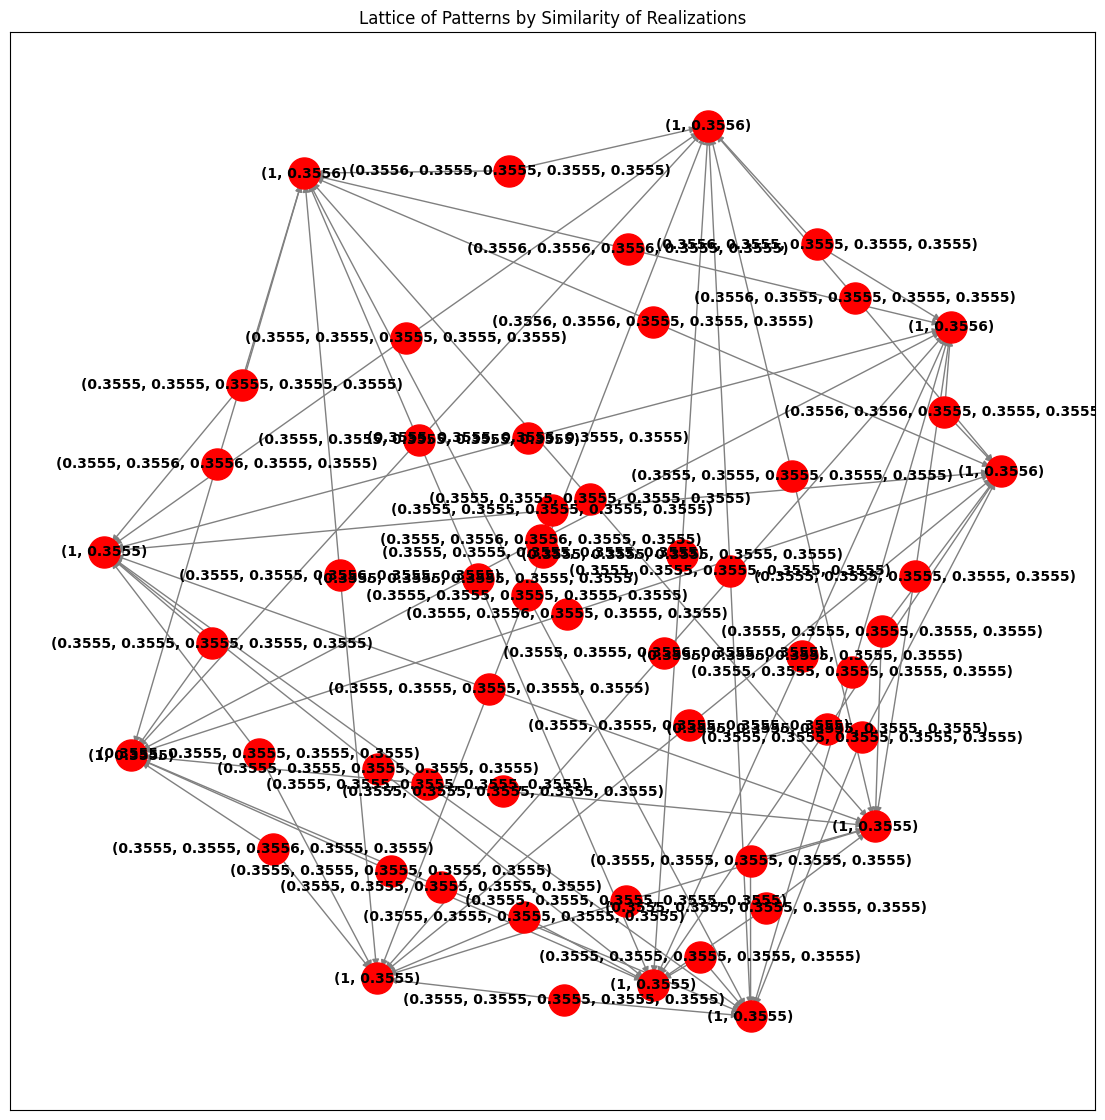

In [30]:
# Визуализация решетки с улучшениями
def visualize_lattice(lattice):
    pos = nx.spring_layout(lattice)  # Позиционирование узлов
    
    # Разделение узлов на новые и остальные
    new_objects = [node for node in lattice.nodes if isinstance(node, tuple) and isinstance(node[0], tuple)]
    existing_objects = [node for node in lattice.nodes if node not in new_objects]
    
    plt.figure(figsize=(14, 14))
    
    # Рисование новых объектов
    nx.draw_networkx_nodes(lattice, pos, nodelist=new_objects, node_color='red', node_size=500)
    # Рисование остальных объектов
    nx.draw_networkx_nodes(lattice, pos, nodelist=existing_objects, node_color='lightblue', node_size=500)
    
    # Рисование ребер
    nx.draw_networkx_edges(lattice, pos, edge_color='gray')
    
    # Подписи узлов с точностью до 2 знаков после запятой
    labels = {node: f"{node[0]:.2f}" if isinstance(node, float) else f"{tuple(round(x[0], 4) for x in node)}" for node in lattice.nodes}
    nx.draw_networkx_labels(lattice, pos, labels, font_size=10, font_weight='bold')
    
    plt.title('Lattice of Patterns by Similarity of Realizations')
    plt.show()

visualize_lattice(lattice)


In [ ]:
# Предсказание значений временного ряда
def predict_next_value(centroids, current_vector):
    distances = np.linalg.norm(centroids[:, :-1] - current_vector, axis=1)
    closest_centroid = centroids[np.argmin(distances)]
    return closest_centroid[-1]

def predict_series(data, patterns, centroids_per_pattern, window_size=10, steps_ahead=100):
    predictions = []
    current_window = data[:window_size].tolist()
    for _ in range(steps_ahead):
        for pattern in patterns:
            z_vector = current_window[-len(pattern):]
            centroids = centroids_per_pattern[pattern]
            next_value = predict_next_value(centroids, z_vector)
            current_window.append(next_value)
            predictions.append(next_value)
            if len(current_window) > window_size:
                current_window.pop(0)
    return predictions

steps_ahead = 100
predicted_series = predict_series(data[3000:, 0], patterns, centroids_per_pattern, steps_ahead=steps_ahead)


In [ ]:
import matplotlib.pyplot as plt

# Визуализация предсказанного временного ряда
def visualize_series(original_series, predicted_series):
    plt.figure(figsize=(14, 7))
    plt.plot(original_series, label='Original Series')
    plt.plot(range(len(original_series), len(original_series) + len(predicted_series)), predicted_series, label='Predicted Series')
    plt.legend()
    plt.title('Original and Predicted Time Series')
    plt.show()

visualize_series(data[3000:, 0], predicted_series)